### 교차 엔트로피 오차

In [8]:
from IPython.display import Image
import numpy as np

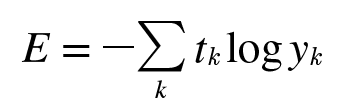

In [9]:
Image("e 4.2.png", width=200)

In [10]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t* np.log(y + delta))

In [15]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [16]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [17]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [18]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

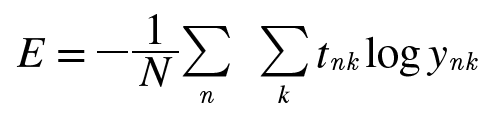

In [20]:
Image("e 4.3.png", width=300)

In [21]:
# 실제 2차원 함수라고 가정을 하고 코드를 만들어야함

def cross_entropy_error(y, t):
    delta = 1e-7
    # 맨 아랫줄이 2차원이니까 혹시 1차원이 나오지 않도록해주자
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t* np.log(y + delta))/ batch_size

In [22]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [23]:
# 1차원을 넣어도 잘 나왔다

#### 왜 손실함수를 설정하는가?

1. 숫자 인식의 경우도 '정확도'를 끌어내는 매개변수를 찾는 것임
2. 근데 왜 정확도가 아니라 손실함수 값이란 우회적인 방법을?
3. 신경망 학습에서의 '미분'의 역할에서 찾을 수 있음
4. 최적 매개변수를 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개 변수 값을 찾음
5. 이때 매개변수의 미분(기울기) 계산, 그 미분 값을 단서로 매겨변수의 값을 서서히 갱신과정 반복
6. 여기서 가중치 매개변수의 손실함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실함수가 어떻게 변하나'라는 의미

###### U 자의 그래프를 생각하면 됨

1. 최저점(기울기 0)을 기준으로 왼쪽은 양의 방향으로 가면 손실함수 감소, 음의 방향으로 가면 손실함수 증가
2. 최저점 기준 오른쪽은 위와 반대니까, 기울기가 0에 가까운 지점으로 수렴하며 움직인다고 생각하면 됨

#### 이 기울기를 통해서 크기와 방향을 모두 구할 수 있음

- 정확도는 그냥 맞은 갯수니까 매개변수 값을 바꿔도 바뀌지 않음
- 그래서 정확도를 지표로 삼을 수 없음

(바뀐다고 해도 불연속적, 연속적일 수 없고, 매개변수와 손실함수는 연속적으로 바뀜)
그래서 계단함수도 하용할 수 없음

### 미분

y = 0.01x^2 + 0.1x

In [26]:
import matplotlib.pylab as plt

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

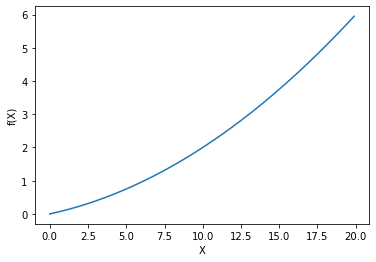

In [30]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot(x, y)

- 중앙 차분에 의한 수치 미분

In [39]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [40]:
numerical_diff(function_1, 5)

0.1999999999990898

In [41]:
a = numerical_diff(function_1, 5)

In [42]:
# 이제 5인 지점에서 접선을 한 번 그려보자

In [43]:
# y = 2x + b
# b = y - 2x

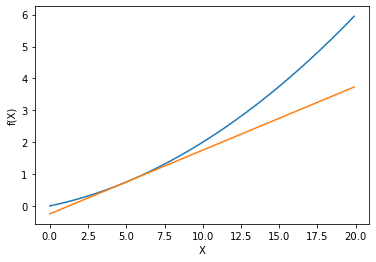

In [44]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
######
b = function_1(5) - (a * 5)
y2 = (a*x) + b

######
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot(x, y)
plt.plot(x, y2)

- 그래디언트(편미분의 벡터)

In [ ]:
Image("e 4.6.png", width=300)

In [47]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [50]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [51]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

- 경사하강법

In [ ]:
Image("e 4.7.png", width=200)

In [55]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x # 임의의 초기값
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x = x - (lr*grad)
        print(x)
    return x

In [56]:
init_x = np.array([-3.0, 4.0]) # 임의의 지점 지정
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

[-2.4  3.2]
[-1.92  2.56]
[-1.536  2.048]
[-1.2288  1.6384]
[-0.98304  1.31072]
[-0.786432  1.048576]
[-0.6291456  0.8388608]
[-0.50331648  0.67108864]
[-0.40265318  0.53687091]
[-0.32212255  0.42949673]
[-0.25769804  0.34359738]
[-0.20615843  0.27487791]
[-0.16492674  0.21990233]
[-0.1319414   0.17592186]
[-0.10555312  0.14073749]
[-0.08444249  0.11258999]
[-0.06755399  0.09007199]
[-0.0540432   0.07205759]
[-0.04323456  0.05764608]
[-0.03458765  0.04611686]
[-0.02767012  0.03689349]
[-0.02213609  0.02951479]
[-0.01770887  0.02361183]
[-0.0141671   0.01888947]
[-0.01133368  0.01511157]
[-0.00906694  0.01208926]
[-0.00725355  0.00967141]
[-0.00580284  0.00773713]
[-0.00464228  0.0061897 ]
[-0.00371382  0.00495176]
[-0.00297106  0.00396141]
[-0.00237684  0.00316913]
[-0.00190148  0.0025353 ]
[-0.00152118  0.00202824]
[-0.00121694  0.00162259]
[-0.00097356  0.00129807]
[-0.00077884  0.00103846]
[-0.00062308  0.00083077]
[-0.00049846  0.00066461]
[-0.00039877  0.00053169]
[-0.00031901  0.

array([-6.11110793e-10,  8.14814391e-10])

In [58]:
# 계속 최저점으로 가는 중
# array([-6.11110793e-10,  8.14814391e-10]) 이게 최저점

- 신경망에서의 기울기

In [59]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [61]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y  = exp_a / sum_exp_a
    
    return y

In [66]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [67]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)

In [70]:
net.W # 처음에 랜덤하게 임의 설정한 가중치

array([[-0.56702216, -0.01523594, -0.84362911],
       [ 0.50779158,  0.26153632, -0.74953022]])

In [71]:
dw # 기울기 벡터(아직 좋아지진 않음)

array([[ 0.25116617,  0.28021489, -0.53138106],
       [ 0.37674926,  0.42032233, -0.79707159]])